/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW
Version: low
For case A we have relative difference 1.18%
For case B we have relative difference 1.46%
For case C we have relative difference 2.07%
For case D we have relative difference 9.04%
For case E we have relative difference 46.15%


Version: typical
For case A we have relative difference 1.50%
For case B we have relative difference 4.88%
For case C we have relative difference 9.12%
For case D we have relative difference 40.44%
For case E we have relative difference 206.55%


Version: high
For case A we have relative difference 3.48%
For case B we have relative difference 16.76%
For case C we have relative difference 31.96%
For case D we have relative difference 141.59%
For case E we have relative difference 657.87%




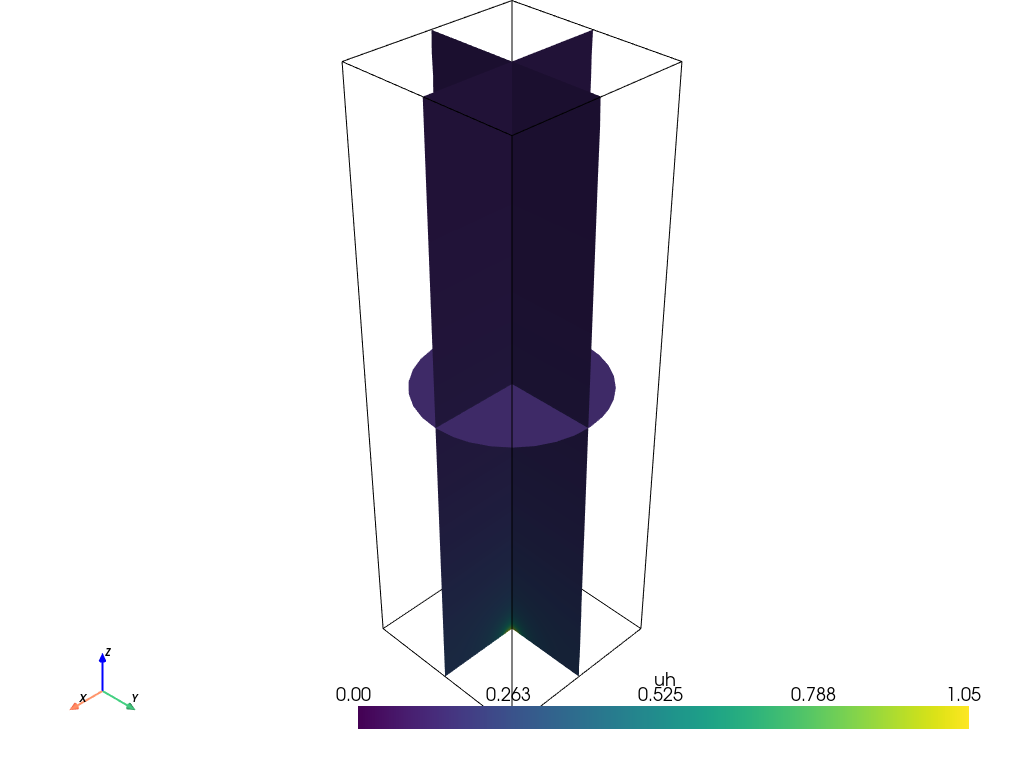

In [4]:
%cd /home/andreasstillits/coding/Leaves1D/PNAS_REVIEW

from review.utils.plotfunctions import plot_3d_solution
from review.utils.constants import ThreeDimExploration
import numpy as np


def plot(case: str, version: str):
    constants = ThreeDimExploration()
    filename = constants.get_base_path(version) / f"solution{case}.bp"
    plot_3d_solution(filename)


def summarize():
    for version in ["low", "typical", "high"]:
        print(f"Version: {version}")
        for case in ["A", "B", "C", "D", "E"]:
            data = np.loadtxt(f"files/lateral_scanning/{version}/solution{case}_summary.txt", skiprows=1, delimiter=";")
            print(f"For case {case} we have relative difference {100*data[2]:.2f}%")
        print("\n")

summarize()
plot("E", "typical")

/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW
Version: low, Plug radius: 0.0761 Stomatal radius: 0.0168
Version: typical, Plug radius: 0.1521 Stomatal radius: 0.0168
Version: high, Plug radius: 0.3043 Stomatal radius: 0.0168


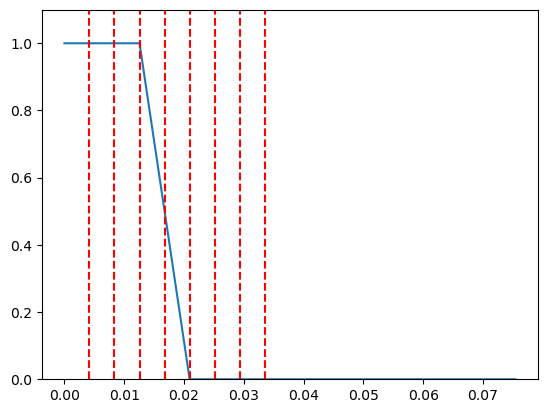

In [2]:
%cd /home/andreasstillits/coding/Leaves1D/PNAS_REVIEW

import matplotlib.pyplot as plt 
import numpy as np
from review.utils.constants import ThreeDimExploration
constants = ThreeDimExploration()

for version in constants.allowed:
    plug = constants.get_plug_radius(version)
    stomata = constants.get_stomatal_radius(version)
    print(f"Version: {version}, Plug radius: {plug:.4f}", f"Stomatal radius: {stomata:.4f}")

version = "low"
plug = constants.get_plug_radius(version)
stomata = constants.get_stomatal_radius(version)

epsilon = 0.002
x = np.arange(0, plug, stomata  / 4.0)
phi = x**2 - stomata**2 
gs = 0.5 * (1 - np.tanh(phi / epsilon / plug**2))


plt.plot(x, gs)
plt.ylim(0, 1.1)
for i in range(8):
    plt.vlines(stomata / 4 * (i+1), 0, 1.1, colors='red', linestyles='dashed')